<a href="https://colab.research.google.com/github/rsradhakrishnan/Taxi-Booking-Data-Analysis/blob/main/Mid_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 


train_features = pd.read_csv('train.csv')
test_features = pd.read_csv('test.csv')
df_features = train_features.append(test_features,ignore_index=True)


train_labels = pd.read_csv('train_label.csv', header=None, names=['Total_Booking'])
test_labels = pd.read_csv('test_label.csv', header=None, names=['Total_Booking'])
df_labels = train_labels.append(test_labels,ignore_index=True)


df = pd.concat([df_features, df_labels], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       10886 non-null  object 
 1   season         10886 non-null  object 
 2   holiday        10886 non-null  int64  
 3   workingday     10886 non-null  int64  
 4   weather        10886 non-null  object 
 5   temp           10886 non-null  float64
 6   atemp          10886 non-null  float64
 7   humidity       10886 non-null  int64  
 8   windspeed      10886 non-null  float64
 9   Total_Booking  10886 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 850.6+ KB


In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [ ]:
df.isnull().sum()

#no null values in the dataset

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_Booking    0
dtype: int64

In [ ]:
df.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_Booking      int64
dtype: object

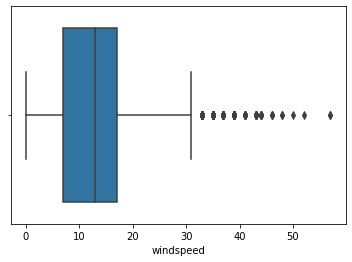

In [ ]:
import seaborn as sns
sns.boxplot(x=df['windspeed'])
#outlier analysis

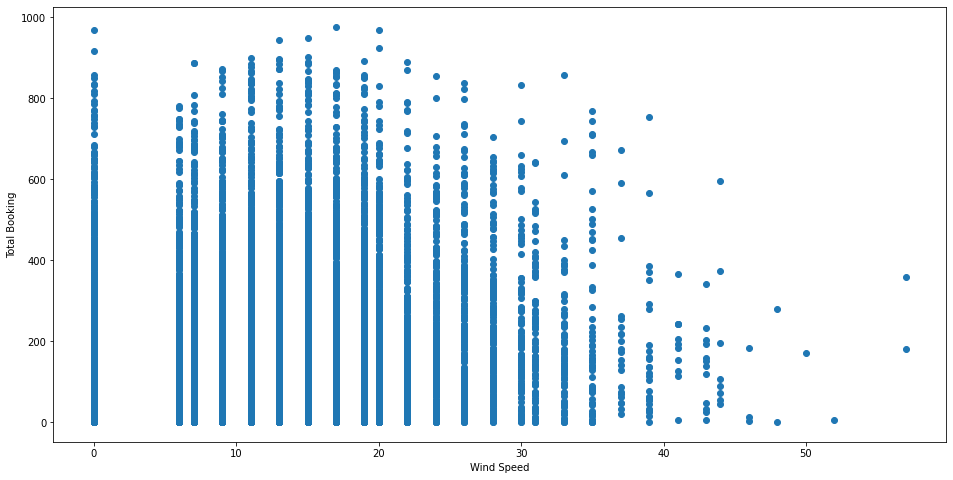

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['windspeed'], df['Total_Booking'])
ax.set_xlabel('Wind Speed')
ax.set_ylabel('Total Booking')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


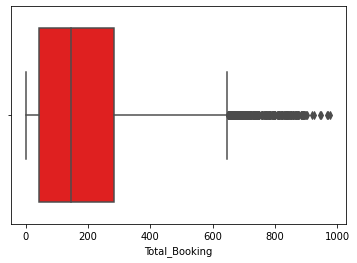

In [ ]:
sns.boxplot(df['Total_Booking'],color='r')

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df[['windspeed','temp','atemp','humidity','Total_Booking']]))
print(z)

[[0.5142603  0.24503701 0.24839078 0.78535767 1.7248125 ]
 [0.75963759 1.08700912 1.14227927 0.88928536 1.03002161]
 [1.12729319 1.85989326 2.07630932 0.61766615 0.29024652]
 ...
 [0.8819159  0.17594904 0.10975464 0.14999154 0.17983232]
 [0.46560752 0.38644207 0.28853234 1.66874304 0.89752458]
 [0.5142603  1.29750214 1.32105696 0.21375537 0.1790138 ]]


In [ ]:
threshold = 3
print(np.where(z > 3))
#outlier rows

(array([    5,    27,    30,    52,   156,   257,   279,   288,   325,
         343,   510,   566,   575,   687,   750,   762,   838,   891,
         946,   956,   970,   971,  1008,  1162,  1200,  1243,  1312,
        1336,  1357,  1375,  1413,  1446,  1489,  1561,  1591,  1601,
        1675,  1799,  1878,  1883,  1894,  1952,  2023,  2065,  2085,
        2116,  2120,  2126,  2184,  2193,  2357,  2386,  2444,  2491,
        2550,  2637,  2663,  2771,  2793,  2800,  2811,  2825,  2878,
        2883,  2963,  2976,  3048,  3055,  3080,  3099,  3101,  3226,
        3250,  3304,  3338,  3351,  3374,  3389,  3441,  3523,  3548,
        3595,  3599,  3646,  3733,  3799,  3799,  3816,  3907,  3915,
        3948,  4018,  4148,  4191,  4202,  4211,  4246,  4369,  4417,
        4489,  4604,  4764,  4765,  4766,  4773,  4798,  4841,  4853,
        4887,  4888,  4956,  4980,  5017,  5065,  5125,  5152,  5167,
        5247,  5265,  5316,  5359,  5362,  5410,  5485,  5502,  5531,
        5603,  5634

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

holiday            0.0000
workingday         1.0000
temp              12.3000
atemp             14.3950
humidity          30.0000
windspeed          9.9964
Total_Booking    242.0000
dtype: float64


In [ ]:
iqr = (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

In [ ]:
iqr.head(10)
#True indicates presence of outlier 
#False indicates Absence of outlier 

,Total_Booking,atemp,datetime,holiday,humidity,season,temp,weather,windspeed,workingday
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [ ]:
#iqr and Z-scores are similar in removing outliers 
df = df[(z < 3).all(axis=1)]
df.head(10)
#5th row had a outlier, with this we have removed such rows

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184
6,10/6/2012 9:00,Winter,0,0,Clear + Few clouds,24.60,29.545,73,12.9980,395
7,9/10/2012 4:00,Fall,0,1,Clear + Few clouds,21.32,25.000,68,19.0012,5
8,7/14/2012 4:00,Fall,0,0,"Light Snow, Light Rain",27.06,31.060,61,7.0015,9
9,2/6/2011 18:00,Spring,0,0,Clear + Few clouds,12.30,15.150,56,11.0014,78
10,1/17/2012 15:00,Spring,0,1,Clear + Few clouds,18.04,21.970,62,32.9975,129


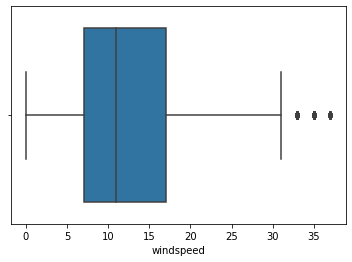

In [ ]:
sns.boxplot(x=df['windspeed'])
#compared to last plot, we have less outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


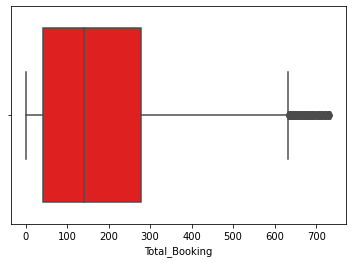

In [ ]:
sns.boxplot(df['Total_Booking'],color='r')

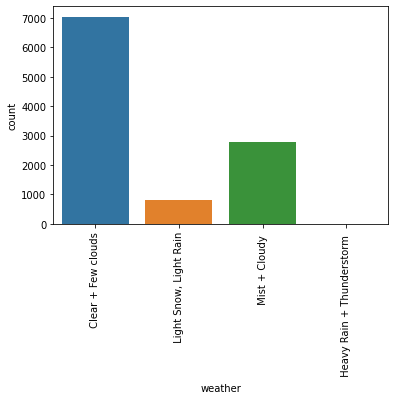

In [ ]:
sns.countplot(x='weather',data=df)
plt.xticks(rotation=90)
plt.show()


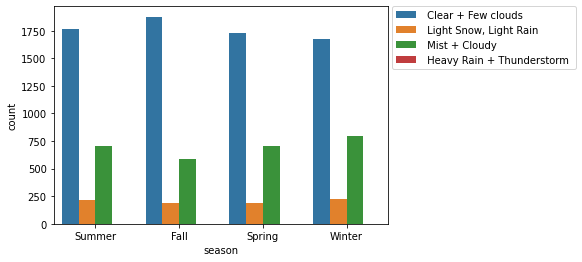

In [ ]:
sns.countplot(x='season',data=df,hue='weather')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

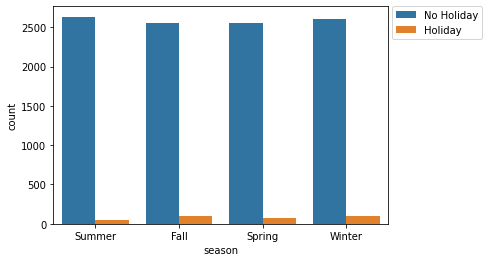

In [ ]:
sns.countplot(x='season',data=df,hue='holiday')
new_labels = ['No Holiday', 'Holiday']
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0,labels=new_labels)
plt.show()
#winter had more holidays

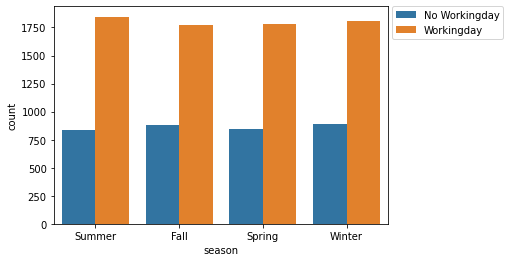

In [ ]:
sns.countplot(x='season',data=df,hue='workingday')
new_labels = ['No Workingday', 'Workingday']
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0,labels=new_labels)
plt.show()
#winter had more holidays

No working and No Holiday =  3136
Total HoliDay =  310
Total Working Day =  7206


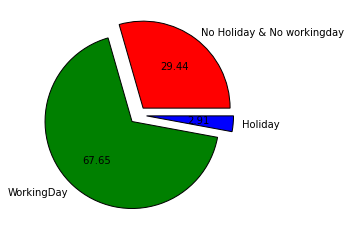

In [ ]:
Not_Holiday_Not_workingday=df[(df.holiday==0) & (df.workingday==0)].shape[0]
print('No working and No Holiday = ', Not_Holiday_Not_workingday)
Holiday=df[(df.holiday==1)].shape[0]
print('Total HoliDay = ', Holiday)
WorkingDay=df[(df.workingday==1)].shape[0]
print('Total Working Day = ', WorkingDay)
plt.pie(x=[Not_Holiday_Not_workingday,WorkingDay,Holiday],labels=['No Holiday & No workingday','WorkingDay','Holiday'],explode=(.1,.1,.1),colors=['r','g','b'],autopct='%.2f',wedgeprops={'edgecolor':'k'})
plt.show()

In [ ]:
df['Year'] = pd.DatetimeIndex(df['datetime']).year
df['Month'] = pd.DatetimeIndex(df['datetime']).month_name()
df['Day'] = pd.DatetimeIndex(df['datetime']).day_name()
df['Hour'] = pd.DatetimeIndex(df['datetime']).hour

In [ ]:
df['timing'] = pd.to_datetime(df.datetime, format='%m/%d/%Y %H:%M')
a = df.assign(dept_session=pd.cut(df.timing.dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))
df['booking_session'] = a['dept_session']

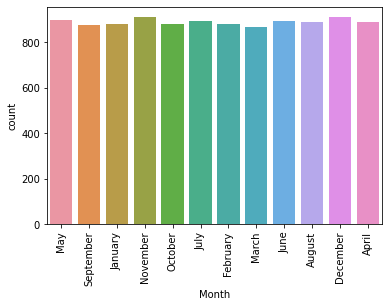

In [ ]:
sns.countplot(x='Month',data=df )
plt.xticks(rotation=90)
plt.show()

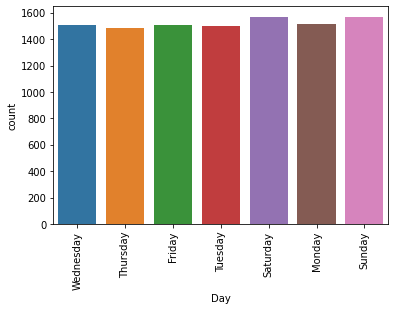

In [ ]:
sns.countplot(x='Day',data=df)
plt.xticks(rotation=90)
plt.show()
#saturdays have more counts

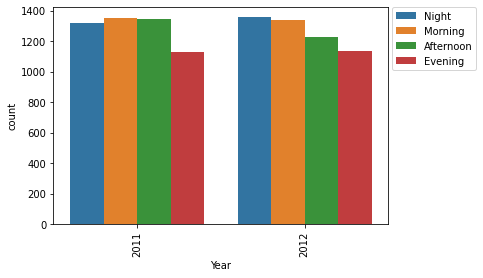

In [ ]:
sns.countplot(x='Year',data=df,hue='booking_session')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xticks(rotation=90)
plt.show()
#evenings have less counts compared to rest of the parts of day

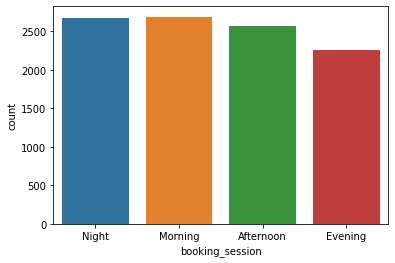

In [ ]:
sns.countplot(x="booking_session", data=df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

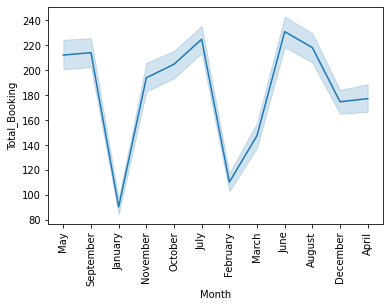

In [ ]:
sns.lineplot(x='Month', y="Total_Booking", data=df, sort=True)
plt.xticks(rotation=90)
#january and february have less booking counts probably due to cold weather

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

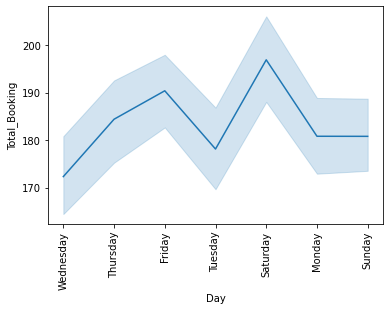

In [ ]:
sns.lineplot(x="Day", y="Total_Booking", data=df)
plt.xticks(rotation=90)

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 <a list of 7 Text major ticklabel objects>)

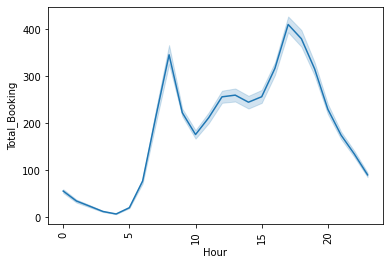

In [ ]:
sns.lineplot(x="Hour", y="Total_Booking", data=df)
plt.xticks(rotation=90)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 11 Text major ticklabel objects>)

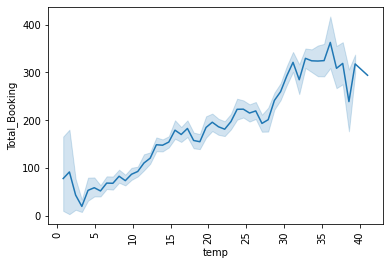

In [ ]:
sns.lineplot(x="temp", y="Total_Booking", data=df)
plt.xticks(rotation=90)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 7 Text major ticklabel objects>)

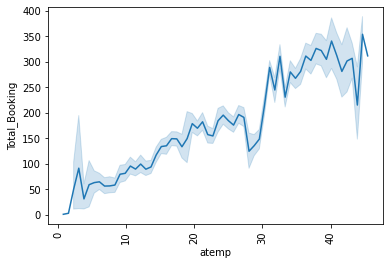

In [ ]:
sns.lineplot(x="atemp", y="Total_Booking", data=df)
plt.xticks(rotation=90)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 10 Text major ticklabel objects>)

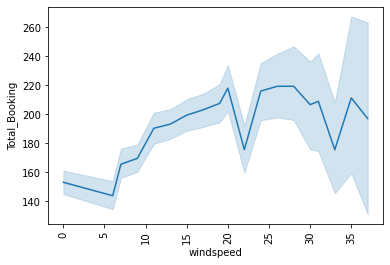

In [ ]:
sns.lineplot(x="windspeed", y="Total_Booking", data=df)
plt.xticks(rotation=90)

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

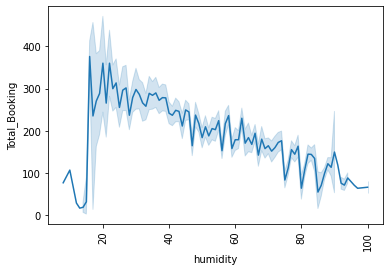

In [ ]:
sns.lineplot(x="humidity", y="Total_Booking", data=df)
plt.xticks(rotation=90)

In [ ]:
corr = df.corr()

In [ ]:
corr

,holiday,workingday,temp,atemp,humidity,windspeed,Total_Booking,Year,Hour
holiday,1.000000,-0.250362,0.001759,-0.003892,-0.002162,0.011416,0.002916,0.014672,0.000753
workingday,-0.250362,1.000000,0.021717,0.016397,-0.002418,0.015365,-0.021374,-0.011887,-0.003216
temp,0.001759,0.021717,1.000000,0.985299,-0.063370,-0.014424,0.384548,0.048924,0.137388
atemp,-0.003892,0.016397,0.985299,1.000000,-0.042041,-0.054425,0.380575,0.046815,0.132688
humidity,-0.002162,-0.002418,-0.063370,-0.042041,1.000000,-0.319418,-0.329349,-0.079916,-0.276303
windspeed,0.011416,0.015365,-0.014424,-0.054425,-0.319418,1.000000,0.115175,-0.014689,0.144700
Total_Booking,0.002916,-0.021374,0.384548,0.380575,-0.329349,0.115175,1.000000,0.233127,0.407052
Year,0.014672,-0.011887,0.048924,0.046815,-0.079916,-0.014689,0.233127,1.000000,-0.012664
Hour,0.000753,-0.003216,0.137388,0.132688,-0.276303,0.144700,0.407052,-0.012664,1.000000


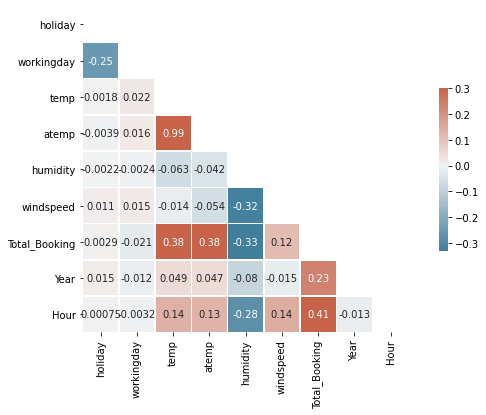

In [ ]:
f, ax = plt.subplots(figsize=(11, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

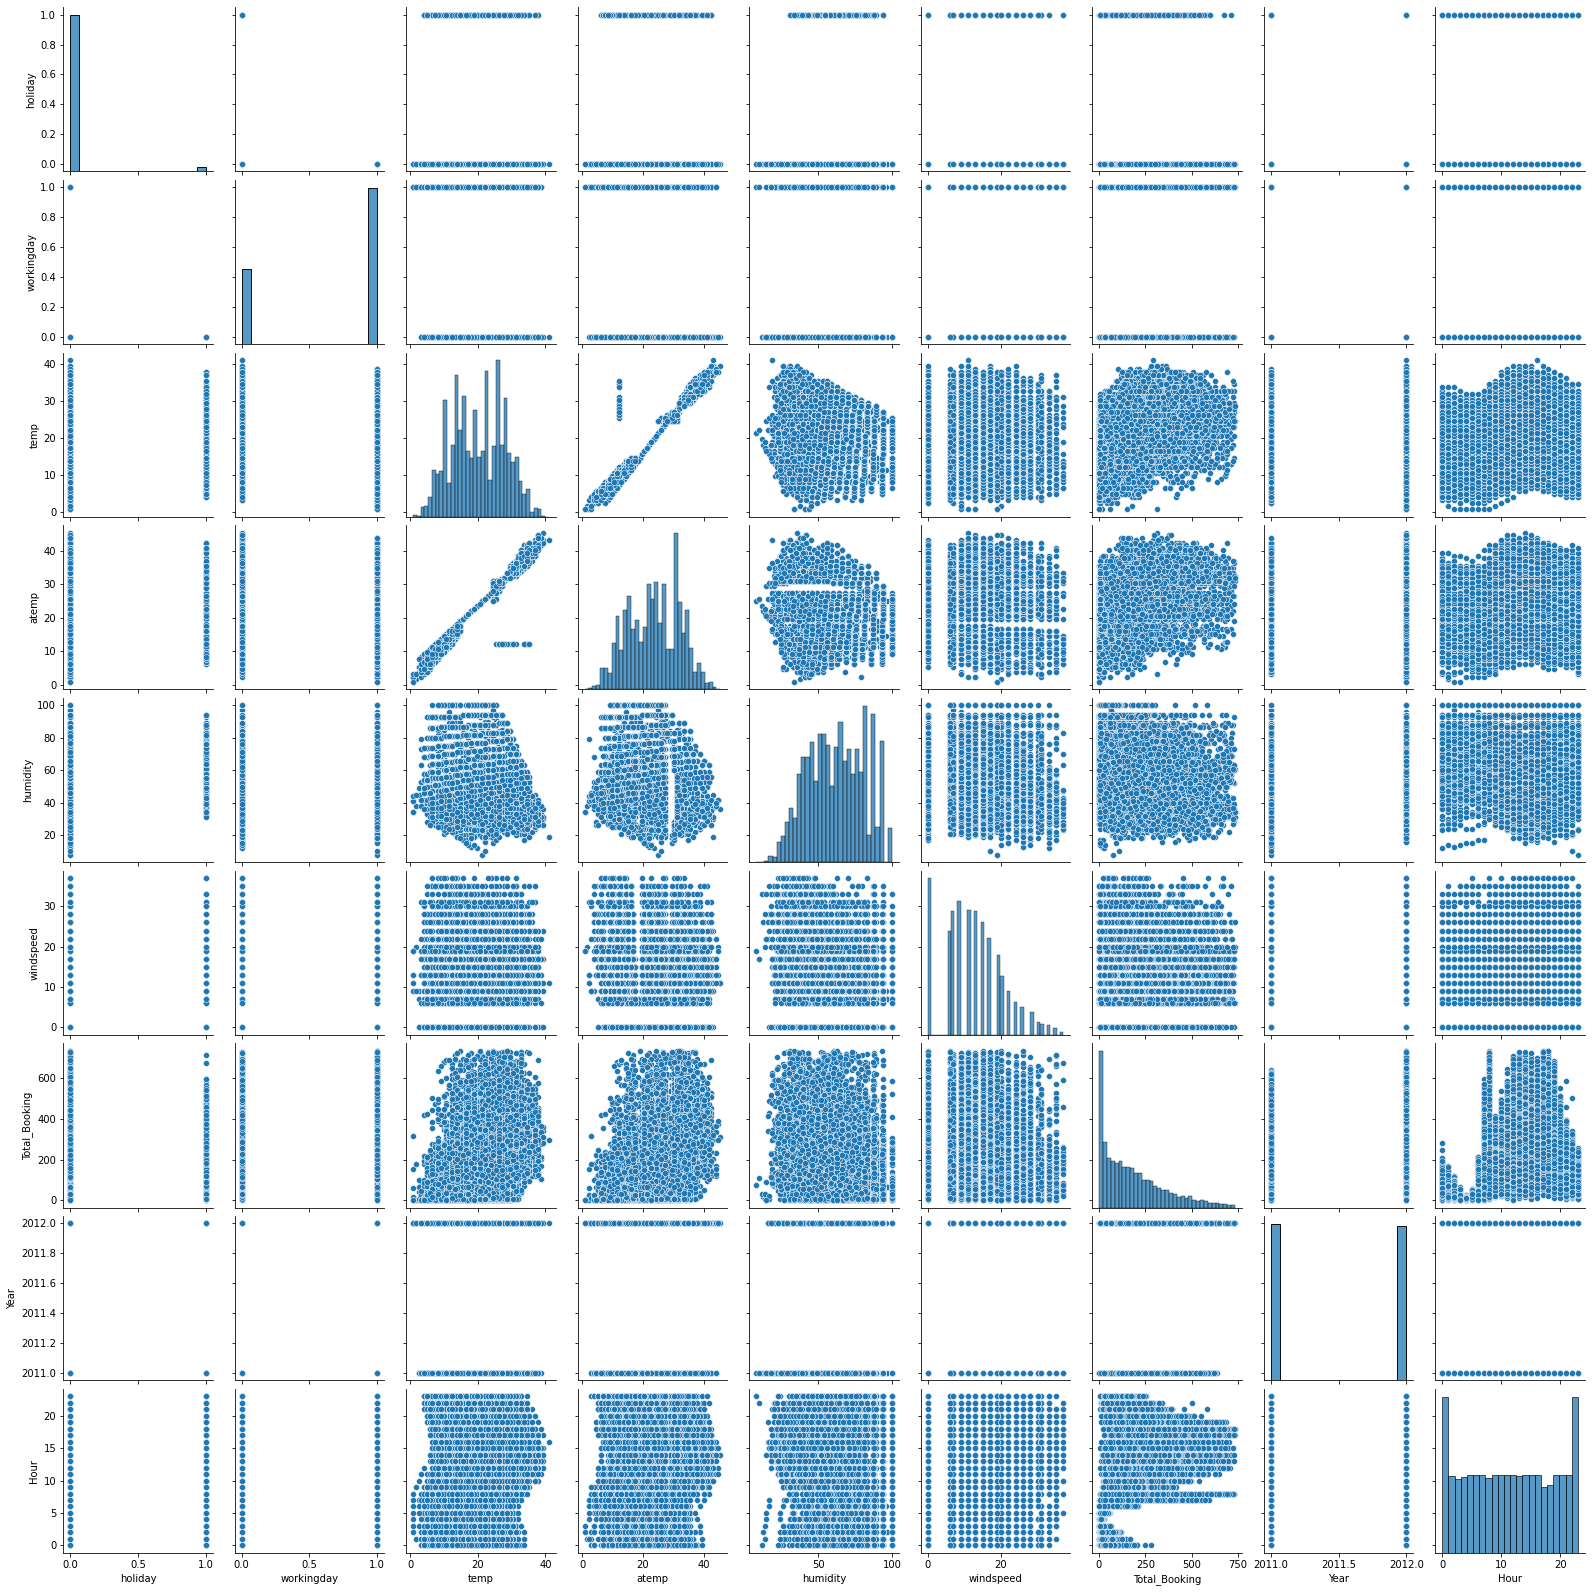

In [ ]:

sns.pairplot(df, kind="scatter")
plt.show()


In [ ]:
##Task -2

In [ ]:
#Tasks to do
'''
1) Add the hour day month and year coloumn to train and Test and remove datetime coloumn
2) convert categorical to numerical 
3) Concantenate the features and labels
4) Remove junk rows where working =0  and holiday = 0 and vice versa
5) Remove the outliers i.e, Reduce the Total_Booking to 600
6) Scale the values
7) remove highly co related coloums 

'''

'\n1) Add the hour day month and year coloumn to train and Test and remove datetime coloumn\n2) convert categorical to numerical \n3) Concantenate the features and labels\n4) Remove junk rows where working =0  and holiday = 0 and vice versa\n5) Remove the outliers i.e, Reduce the Total_Booking to 600\n6) Scale the values\n7) remove highly co related coloums \n\n'

In [ ]:
train_features.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012
5,8/17/2012 17:00,Fall,0,1,Clear + Few clouds,33.62,12.120,36,22.0028
6,10/6/2012 9:00,Winter,0,0,Clear + Few clouds,24.60,29.545,73,12.9980
7,9/10/2012 4:00,Fall,0,1,Clear + Few clouds,21.32,25.000,68,19.0012
8,7/14/2012 4:00,Fall,0,0,"Light Snow, Light Rain",27.06,31.060,61,7.0015
9,2/6/2011 18:00,Spring,0,0,Clear + Few clouds,12.30,15.150,56,11.0014


In [ ]:
test_features.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994
5,4/1/2011 23:00,Summer,0,1,Clear + Few clouds,12.30,15.910,61,6.0032
6,5/15/2011 18:00,Summer,0,0,Clear + Few clouds,22.96,26.515,78,16.9979
7,11/1/2012 18:00,Winter,0,1,Mist + Cloudy,16.40,20.455,50,11.0014
8,10/12/2012 16:00,Winter,0,1,Clear + Few clouds,18.86,22.725,41,23.9994
9,3/18/2011 3:00,Spring,0,1,Clear + Few clouds,14.76,17.425,71,12.9980


In [ ]:
train_features['datetime']=pd.to_datetime(train_features['datetime'])
test_features['datetime']=pd.to_datetime(test_features['datetime'])

train_features['Year'] = pd.DatetimeIndex(train_features['datetime']).year
train_features['Month'] = pd.DatetimeIndex(train_features['datetime']).month
train_features['Day'] = pd.DatetimeIndex(train_features['datetime']).day
train_features['Hour'] = pd.DatetimeIndex(train_features['datetime']).hour

test_features['Year'] = pd.DatetimeIndex(test_features['datetime']).year
test_features['Month'] = pd.DatetimeIndex(test_features['datetime']).month
test_features['Day'] = pd.DatetimeIndex(test_features['datetime']).day
test_features['Hour'] = pd.DatetimeIndex(test_features['datetime']).hour


## Adding Hour Day Month and Year to Train features and Test features

In [ ]:
train_features=train_features.drop('datetime',axis=1)
test_features=test_features.drop('datetime',axis=1)

# Drop Date and time coloumn from Train features and test features

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder= LabelEncoder() 
train_features['season']= labelencoder.fit_transform(train_features['season'])
train_features['weather']= labelencoder.fit_transform(train_features['weather'])

test_features['season']= labelencoder.fit_transform(test_features['season']) 
test_features['weather']= labelencoder.fit_transform(test_features['weather'])

#Label Encoding the season and weather coulmns

In [ ]:
#Combine features and Labels
train = pd.concat([train_features, train_labels], axis=1)
test = pd.concat([test_features, test_labels], axis=1)

In [ ]:
# Have Only Rows with Holiday = 1 and Working Day = 0 and vice versa....remaining is junk data
train = train[((train['holiday']==1)&(train['workingday']==0))|((train['holiday']==0)&(train['workingday']==1))]
test = test[((test['holiday']==1)&(test['workingday']==0))|((test['holiday']==0)&(test['workingday']==1))]

In [ ]:
#outlier removal
train.loc[train['Total_Booking']>600, 'Total_Booking']=np.mean(train['Total_Booking'])
test.loc[test['Total_Booking']>600, 'Total_Booking']=np.mean(test['Total_Booking'])

##there were major outliers in Total Booking coloumn

In [ ]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,Month,Day,Hour,Total_Booking
0,2,0,1,0,22.14,25.760,77,16.9979,2012,5,2,19,504.0
1,0,0,1,0,28.70,33.335,79,19.0012,2012,9,5,4,5.0
2,1,0,1,0,5.74,6.060,50,22.0028,2011,1,13,9,139.0
3,3,0,1,0,13.94,16.665,29,8.9981,2011,11,18,16,209.0
4,0,0,1,0,30.34,33.335,51,19.0012,2011,9,13,13,184.0


In [ ]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,Month,Day,Hour,Total_Booking
0,2,0,1,0,21.32,25.000,48,35.0008,2012,5,10,11,256.00000
3,3,0,1,2,25.42,28.790,83,0.0000,2011,10,13,11,84.00000
5,2,0,1,0,12.30,15.910,61,6.0032,2011,4,1,23,53.00000
7,3,0,1,2,16.40,20.455,50,11.0014,2012,11,1,18,186.50548
8,3,0,1,0,18.86,22.725,41,23.9994,2012,10,12,16,520.00000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(train)
train = pd.DataFrame(df,columns=train.columns)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,Month,Day,Hour,Total_Booking
0,0.441294,-0.204606,0.204606,-0.714387,0.221243,0.231859,0.807636,0.496637,0.991289,-0.445404,-1.475759,1.077260,2.305714
1,-1.342961,-0.204606,0.204606,-0.714387,1.059301,1.123802,0.911924,0.741193,0.991289,0.722161,-0.925293,-1.104933,-1.155529
2,-0.450834,-0.204606,0.204606,-0.714387,-1.873903,-2.087782,-0.600244,1.107618,-1.008788,-1.612969,0.542618,-0.377535,-0.226057
3,1.333422,-0.204606,0.204606,-0.714387,-0.826330,-0.839062,-1.695262,-0.479950,-1.008788,1.305944,1.460062,0.640822,0.259488
4,-1.342961,-0.204606,0.204606,-0.714387,1.268816,1.123802,-0.548100,0.741193,-1.008788,0.722161,0.542618,0.204383,0.086079


In [ ]:
df1 = scaler.fit_transform(test)
test = pd.DataFrame(df1,columns=test.columns)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,Month,Day,Hour,Total_Booking
0,0.452927,-0.205764,0.205764,-0.702614,0.134041,0.150451,-0.763986,2.735274,1.009718,-0.425806,0.024383,-0.055019,0.647350
1,1.346679,-0.205764,0.205764,1.586785,0.668482,0.605410,1.050389,-1.561270,-0.990375,1.019957,0.575141,-0.055019,-0.559516
2,0.452927,-0.205764,0.205764,-0.702614,-1.041729,-0.940730,-0.090075,-0.824344,-0.990375,-0.714958,-1.627889,1.643192,-0.777033
3,1.346679,-0.205764,0.205764,1.586785,-0.507288,-0.395139,-0.660308,-0.210787,1.009718,1.309110,-1.627889,0.935604,0.159730
4,1.346679,-0.205764,0.205764,-0.702614,-0.186624,-0.122644,-1.126862,1.384790,1.009718,1.019957,0.391555,0.652569,2.499749


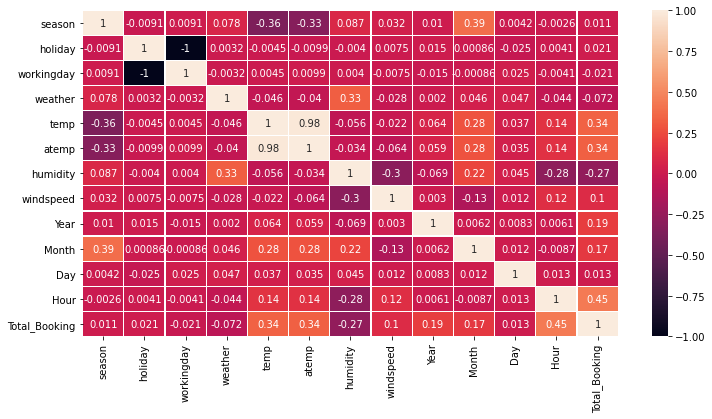

In [ ]:
plt.figure(figsize=(12,6))

corr = train.corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True, linewidths=.2)

## atemp and temp coloums are co related we can remove any one ove the coloumn

In [ ]:
train=train.drop('atemp',axis=1)
test=test.drop('atemp',axis=1)

In [ ]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'Year', 'Month', 'Day', 'Hour', 'Total_Booking'],
      dtype='object')

In [ ]:
train.describe()

,season,holiday,workingday,weather,temp,humidity,windspeed,Year,Month,Day,Hour,Total_Booking
count,6.172000e+03,6.172000e+03,6.172000e+03,6.172000e+03,6.172000e+03,6.172000e+03,6.172000e+03,6.172000e+03,6.172000e+03,6.172000e+03,6.172000e+03,6.172000e+03
mean,-6.553949e-17,-1.895312e-16,1.883710e-16,1.277152e-16,-9.182545e-16,7.558583e-17,1.092595e-16,-1.578956e-14,-7.075423e-16,2.860383e-17,-4.130958e-17,-1.293162e-16
std,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00
min,-1.342961e+00,-2.046060e-01,-4.887443e+00,-7.143868e-01,-2.502447e+00,-3.207430e+00,-1.578406e+00,-1.008788e+00,-1.612969e+00,-1.659248e+00,-1.686851e+00,-1.183274e+00
25%,-1.342961e+00,-2.046060e-01,2.046060e-01,-7.143868e-01,-8.263300e-01,-8.088189e-01,-7.236881e-01,-1.008788e+00,-7.372952e-01,-9.252925e-01,-8.139736e-01,-8.919473e-01
50%,4.412939e-01,-2.046060e-01,2.046060e-01,-7.143868e-01,1.164856e-01,-2.666324e-02,8.343448e-03,9.912888e-01,1.383788e-01,-7.848516e-03,5.890366e-02,-1.289480e-01
75%,1.333422e+00,-2.046060e-01,2.046060e-01,1.530621e+00,7.450294e-01,8.076361e-01,7.411929e-01,9.912888e-01,1.014053e+00,9.095955e-01,8.226713e-01,5.716242e-01
max,1.333422e+00,4.887443e+00,2.046060e-01,1.530621e+00,2.316389e+00,2.006941e+00,4.769411e+00,9.912888e-01,1.597835e+00,1.643551e+00,1.659179e+00,2.971604e+00


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6172 entries, 0 to 6171
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         6172 non-null   float64
 1   holiday        6172 non-null   float64
 2   workingday     6172 non-null   float64
 3   weather        6172 non-null   float64
 4   temp           6172 non-null   float64
 5   humidity       6172 non-null   float64
 6   windspeed      6172 non-null   float64
 7   Year           6172 non-null   float64
 8   Month          6172 non-null   float64
 9   Day            6172 non-null   float64
 10  Hour           6172 non-null   float64
 11  Total_Booking  6172 non-null   float64
dtypes: float64(12)
memory usage: 578.8 KB


In [ ]:
##No Null Values, So we are good to Go With Learning 

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from math import sqrt
from sklearn.model_selection import GridSearchCV

In [ ]:
xtrain=train.drop('Total_Booking', axis=1)
ytrain=train.Total_Booking

In [ ]:
xtest=test.drop('Total_Booking', axis=1)
ytest=test.Total_Booking

In [ ]:
xtrain.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,Year,Month,Day,Hour
0,0.441294,-0.204606,0.204606,-0.714387,0.221243,0.807636,0.496637,0.991289,-0.445404,-1.475759,1.077260
1,-1.342961,-0.204606,0.204606,-0.714387,1.059301,0.911924,0.741193,0.991289,0.722161,-0.925293,-1.104933
2,-0.450834,-0.204606,0.204606,-0.714387,-1.873903,-0.600244,1.107618,-1.008788,-1.612969,0.542618,-0.377535
3,1.333422,-0.204606,0.204606,-0.714387,-0.826330,-1.695262,-0.479950,-1.008788,1.305944,1.460062,0.640822
4,-1.342961,-0.204606,0.204606,-0.714387,1.268816,-0.548100,0.741193,-1.008788,0.722161,0.542618,0.204383


In [ ]:
ytest.head()

0    0.647350
1   -0.559516
2   -0.777033
3    0.159730
4    2.499749
Name: Total_Booking, dtype: float64

In [ ]:
xtest.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,Year,Month,Day,Hour
0,0.452927,-0.205764,0.205764,-0.702614,0.134041,-0.763986,2.735274,1.009718,-0.425806,0.024383,-0.055019
1,1.346679,-0.205764,0.205764,1.586785,0.668482,1.050389,-1.561270,-0.990375,1.019957,0.575141,-0.055019
2,0.452927,-0.205764,0.205764,-0.702614,-1.041729,-0.090075,-0.824344,-0.990375,-0.714958,-1.627889,1.643192
3,1.346679,-0.205764,0.205764,1.586785,-0.507288,-0.660308,-0.210787,1.009718,1.309110,-1.627889,0.935604
4,1.346679,-0.205764,0.205764,-0.702614,-0.186624,-1.126862,1.384790,1.009718,1.019957,0.391555,0.652569


In [ ]:
ytest.head()

0    0.647350
1   -0.559516
2   -0.777033
3    0.159730
4    2.499749
Name: Total_Booking, dtype: float64

In [ ]:
#K Fold Cross validation to use for each model 

def cross_validation_score(ml_model,cols = xtrain.columns):
    i = 1
    cv_scores=[]
   
    kf = KFold(n_splits=5,random_state=42,shuffle=True)
    for train_index,test_index in kf.split(xtrain,ytrain):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        model = ml_model
        model.fit(xtrain, ytrain)
        pred_val = model.predict(xtest)
        
        rmse_score = sqrt(mean_squared_error(ytest, pred_val))
        msg = ""
        msg += "RMSE score: {}".format(rmse_score)
        print("{}".format(msg))
        
        
        # Save scores
        cv_scores.append(rmse_score)
        i+=1
    return cv_scores

In [ ]:
#Linear Regression
LR_scores = cross_validation_score(LinearRegression())


1 of kfold 5
RMSE score: 0.8100958962633761

2 of kfold 5
RMSE score: 0.8100958962633761

3 of kfold 5
RMSE score: 0.8100958962633761

4 of kfold 5
RMSE score: 0.8100958962633761

5 of kfold 5
RMSE score: 0.8100958962633761


In [ ]:
#Decision Trees
DT_scores = cross_validation_score(DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20))


1 of kfold 5
RMSE score: 0.42954605140587093

2 of kfold 5
RMSE score: 0.42954326170792023

3 of kfold 5
RMSE score: 0.42954326170792023

4 of kfold 5
RMSE score: 0.429546051405871

5 of kfold 5
RMSE score: 0.4295434721246276


In [ ]:
#KNeighborsRegressor

KNN_scores = cross_validation_score(KNeighborsRegressor(n_neighbors=2))


1 of kfold 5
RMSE score: 0.7729250218840997

2 of kfold 5
RMSE score: 0.7729250218840997

3 of kfold 5
RMSE score: 0.7729250218840997

4 of kfold 5
RMSE score: 0.7729250218840997

5 of kfold 5
RMSE score: 0.7729250218840997


In [ ]:
#Ridge
ridge_scores = cross_validation_score(Ridge(alpha=1.0))


1 of kfold 5
RMSE score: 0.8100827360563012

2 of kfold 5
RMSE score: 0.8100827360563012

3 of kfold 5
RMSE score: 0.8100827360563012

4 of kfold 5
RMSE score: 0.8100827360563012

5 of kfold 5
RMSE score: 0.8100827360563012


In [ ]:
#Lasso
lasso_scores = cross_validation_score(Lasso(alpha=0.1))


1 of kfold 5
RMSE score: 0.8347841270825329

2 of kfold 5
RMSE score: 0.8347841270825329

3 of kfold 5
RMSE score: 0.8347841270825329

4 of kfold 5
RMSE score: 0.8347841270825329

5 of kfold 5
RMSE score: 0.8347841270825329


In [ ]:
regression_scores =  pd.DataFrame({'Linear regression':LR_scores, 'Decision Tree': DT_scores, 'KNN':KNN_scores, 
                             'Ridge':ridge_scores,'Lasso':lasso_scores})

In [ ]:
regression_scores

,Linear regression,Decision Tree,KNN,Ridge,Lasso
0,0.810096,0.429546,0.772925,0.810083,0.834784
1,0.810096,0.429543,0.772925,0.810083,0.834784
2,0.810096,0.429543,0.772925,0.810083,0.834784
3,0.810096,0.429546,0.772925,0.810083,0.834784
4,0.810096,0.429543,0.772925,0.810083,0.834784


In [ ]:
##RMSE IN DECISIOIN TREE IS LESS COMPARED TO OTHER REGRESSORS

In [ ]:
from sklearn.model_selection import GridSearchCV

DT = DecisionTreeRegressor()

parameters = {'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8],
              'splitter': ["best", "random"],
             }


acc_scorer = make_scorer(mean_squared_error )

grid_obj = GridSearchCV(DT, parameters)
grid_obj = grid_obj.fit(xtrain, ytrain)

#

In [ ]:
clf = grid_obj.best_estimator_

clf.fit(xtrain, ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
predictions = clf.predict(xtest)
rmse_score = sqrt(mean_squared_error(ytest, predictions))
print(rmse_score)

0.42496271696458576


In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

In [ ]:
rf_params = {'random_state': 24, 'n_estimators': 25, 'max_depth': 20, 'n_jobs': -1, "min_samples_split": 2}
rf_scores = cross_validation_score(RandomForestRegressor(**rf_params))


1 of kfold 5
RMSE score: 0.35604256303253706

2 of kfold 5
RMSE score: 0.35604256303253706

3 of kfold 5
RMSE score: 0.35604256303253706

4 of kfold 5
RMSE score: 0.35604256303253706

5 of kfold 5
RMSE score: 0.35604256303253706


In [ ]:
ada_scores = cross_validation_score(AdaBoostRegressor(n_estimators=50, random_state=0))


1 of kfold 5
RMSE score: 0.6209054146185017

2 of kfold 5
RMSE score: 0.6209054146185017

3 of kfold 5
RMSE score: 0.6209054146185017

4 of kfold 5
RMSE score: 0.6209054146185017

5 of kfold 5
RMSE score: 0.6209054146185017


In [ ]:
xgb_scores= cross_validation_score(XGBRegressor(max_depth=15,learning_rate=0.1,n_estimators=50, min_child_weight=5, random_state=42,objective='reg:squarederror',reg_lambda=5))


1 of kfold 5
RMSE score: 0.35021674238281936

2 of kfold 5
RMSE score: 0.35021674238281936

3 of kfold 5
RMSE score: 0.35021674238281936

4 of kfold 5
RMSE score: 0.35021674238281936

5 of kfold 5
RMSE score: 0.35021674238281936


In [ ]:
ensembled_scores = pd.DataFrame({'Random Forest':rf_scores, 'AdaBoost Regressor':ada_scores,'XGBRegressor':xgb_scores})
ensembled_scores.head()

,Random Forest,AdaBoost Regressor,XGBRegressor
0,0.356043,0.620905,0.350217
1,0.356043,0.620905,0.350217
2,0.356043,0.620905,0.350217
3,0.356043,0.620905,0.350217
4,0.356043,0.620905,0.350217


In [ ]:
# 1) XGBoost Regressor has less RMSE
# 2) Random Forest is second in having less rmse scores

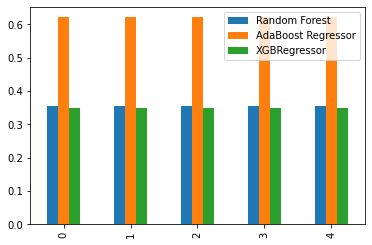

In [ ]:
ensembled_scores.plot(kind="bar")